# Initialisation

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import (StandardScaler, MinMaxScaler) # Best combination
import statsmodels.api as sm
import statsmodels.tools
from sklearn.linear_model import LassoCV

In [3]:
df = pd.read_csv("Life Expectancy Data.csv")

In [4]:
def pre_split_feature_eng(df):
    df = df.copy()
    # df = pd.get_dummies(df, columns = ['Country'], drop_first = True, prefix = 'Country', dtype = int)
    df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region', dtype = int)
    df['log_GDP'] = np.log(df['GDP_per_capita'])
    df['immunisation_avg'] = (df['Polio'] + df['Diphtheria'] + df['Hepatitis_B']) / 3 # + df['Measles']
    return df

In [5]:
OHE_df = pre_split_feature_eng(df)

In [6]:
feature_cols = list(OHE_df.columns)
feature_cols.remove('Life_expectancy')

In [7]:
X = OHE_df[feature_cols]
y = OHE_df['Life_expectancy']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# EDA

In [9]:
df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

In [10]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [11]:
df.shape

(2864, 21)

In [12]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [13]:
df.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

In [14]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [15]:
df.Region.unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [16]:
df.groupby(by = "Country").count().sort_values(by = "Region", ascending = True)

Region  Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
Country                                                                        
Afghanistan      16    16             16                 16               16   
Nepal            16    16             16                 16               16   
Netherlands      16    16             16                 16               16   
New Zealand      16    16             16                 16               16   
Nicaragua        16    16             16                 16               16   
...             ...   ...            ...                ...              ...   
Germany          16    16             16                 16               16   
Ghana            16    16             16                 16               16   
Greece           16    16             16                 16               16   
Czechia          16    16             16                 16               16   
Zimbabwe         16    16             16                 16               16   

             Alcohol_consumption  Hepatitis_B  Measles  BMI  Polio  \
Country                                                              
Afghanistan                   16           16       16   16     16   
Nepal                         16           16       16   16     16   
Netherlands                   16           16       16   16     16   
New Zealand                   16           16       16   16     16   
Nicaragua                     16           16       16   16     16   
...                          ...          ...      ...  ...    ...   
Germany                       16           16       16   16     16   
Ghana                         16           16       16   16     16   
Greece                        16           16       16   16     16   
Czechia                       16           16       16   16     16   
Zimbabwe                      16           16       16   16     16   

             Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
Country                                                                  
Afghanistan          16             16              16              16   
Nepal                16             16              16              16   
Netherlands          16             16              16              16   
New Zealand          16             16              16              16   
Nicaragua            16             16              16              16   
...                 ...            ...             ...             ...   
Germany              16             16              16              16   
Ghana                16             16              16              16   
Greece               16             16              16              16   
Czechia              16             16              16              16   
Zimbabwe             16             16              16              16   

             Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
Country                                                                         
Afghanistan                           16                        16         16   
Nepal                                 16                        16         16   
Netherlands                           16                        16         16   
New Zealand                           16                        16         16   
Nicaragua                             16                        16         16   
...                                  ...                       ...        ...   
Germany                               16                        16         16   
Ghana                                 16                        16         16   
Greece                                16                        16         16   
Czechia                               16                        16         16   
Zimbabwe                              16                        16         16   

             Economy_status_Developed  Econo

In [17]:
df[df.Country == 'Afghanistan']

Country Region  Year  Infant_deaths  Under_five_deaths  \
68    Afghanistan   Asia  2000           90.5              129.2   
175   Afghanistan   Asia  2014           55.2               73.6   
351   Afghanistan   Asia  2013           57.3               76.9   
462   Afghanistan   Asia  2008           69.2               95.7   
614   Afghanistan   Asia  2006           74.6              104.1   
679   Afghanistan   Asia  2002           85.3              121.1   
998   Afghanistan   Asia  2005           77.3              108.4   
1059  Afghanistan   Asia  2010           64.2               87.8   
1066  Afghanistan   Asia  2015           53.2               70.4   
1147  Afghanistan   Asia  2004           80.0              112.6   
1164  Afghanistan   Asia  2012           59.5               80.3   
1221  Afghanistan   Asia  2003           82.7              116.9   
1693  Afghanistan   Asia  2001           87.9              125.2   
1962  Afghanistan   Asia  2007           71.9               99.9   
2062  Afghanistan   Asia  2009           66.7               91.7   
2486  Afghanistan   Asia  2011           61.8               84.0   

      Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
68           310.8305                0.020           62       12  21.7  ...   
175          231.9780                0.010           62       44  23.2  ...   
351          236.2210                0.010           64       38  23.0  ...   
462          259.8060                0.028           64       23  22.5  ...   
614          271.4905                0.026           64       18  22.3  ...   
679          298.8855                0.020           64       14  21.9  ...   
998          278.3395                0.016           66       17  22.2  ...   
1059         250.1350                0.020           66       29  22.7  ...   
1066         227.7350                0.000           65       42  23.3  ...   
1147         285.1880                0.020           67       16  22.1  ...   
1164         240.4640                0.010           67       33  22.9  ...   
1221         292.0365                0.020           65       15  22.0  ...   
1693         304.8580                0.020           63       13  21.8  ...   
1962         264.6415                0.018           63       21  22.4  ...   
2062         254.9705                0.010           63       24  22.6  ...   
2486         245.3000                0.010           68       31  22.8  ...   

      Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
68            24           0.02             148           20.78   
175           62           0.03             565           33.37   
351           64           0.03             569           32.27   
462           64           0.02             399           27.72   
614           58           0.02             354           26.43   
679           36           0.02             320           22.60   
998           58           0.02             346           25.65   
1059          66           0.02             526           29.19   
1066          65           0.03             556           34.41   
1147          50           0.02             323           24.73   
1164          67           0.03             558           31.16   
1221          41           0.02             332           23.68   
1693          33           0.02             163           21.61   
1962          63           0.02             393           27.10   
2062          63           0.02             473           28.39   
2486          68           0.02             512           30.12   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
68                            2.3                       2.5        2.2   
175                          17.5                      17.5        3.5   
351                          17.7                      17.7        3.5   
462                          18.8                      18.9        3.0   

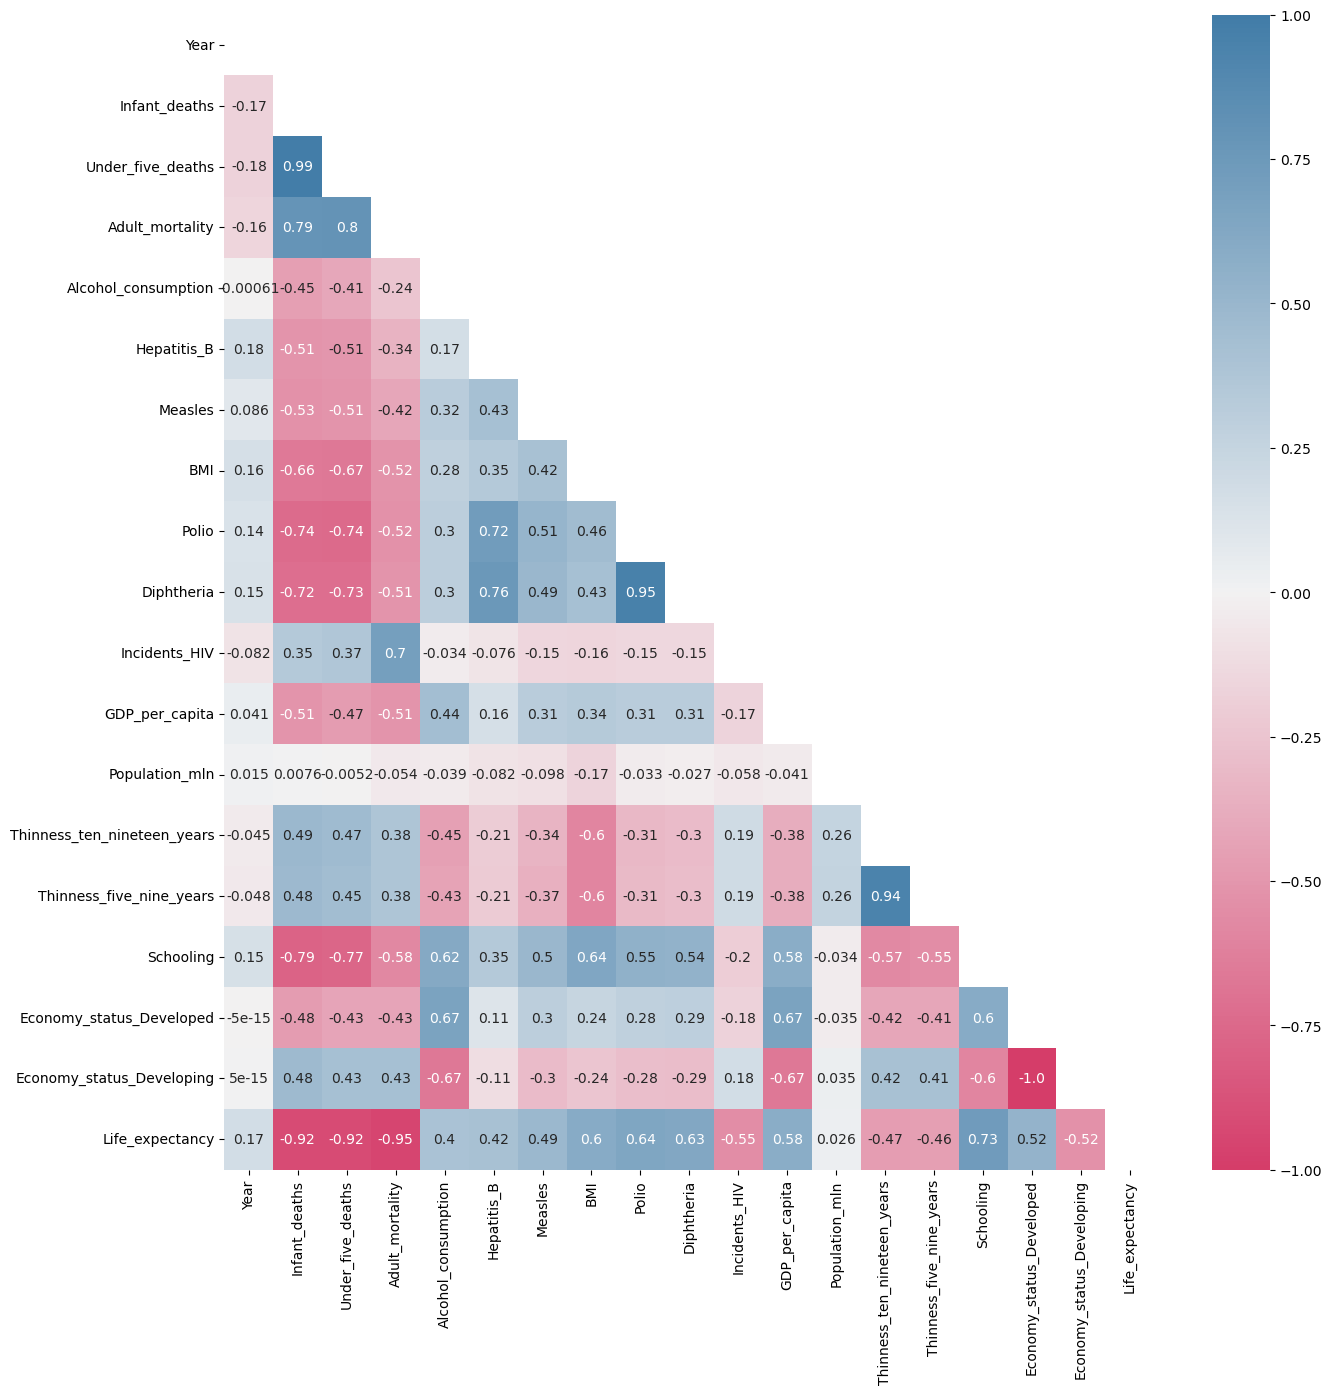

In [19]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(numeric_only=True), 
            annot = True,
            vmin = -1 ,
            vmax = +1 ,
            cmap=sns.diverging_palette(0, 240, as_cmap=True) ,
            fmt = '.2' ,
            mask = np.triu(df.corr(numeric_only=True)))

plt.show()

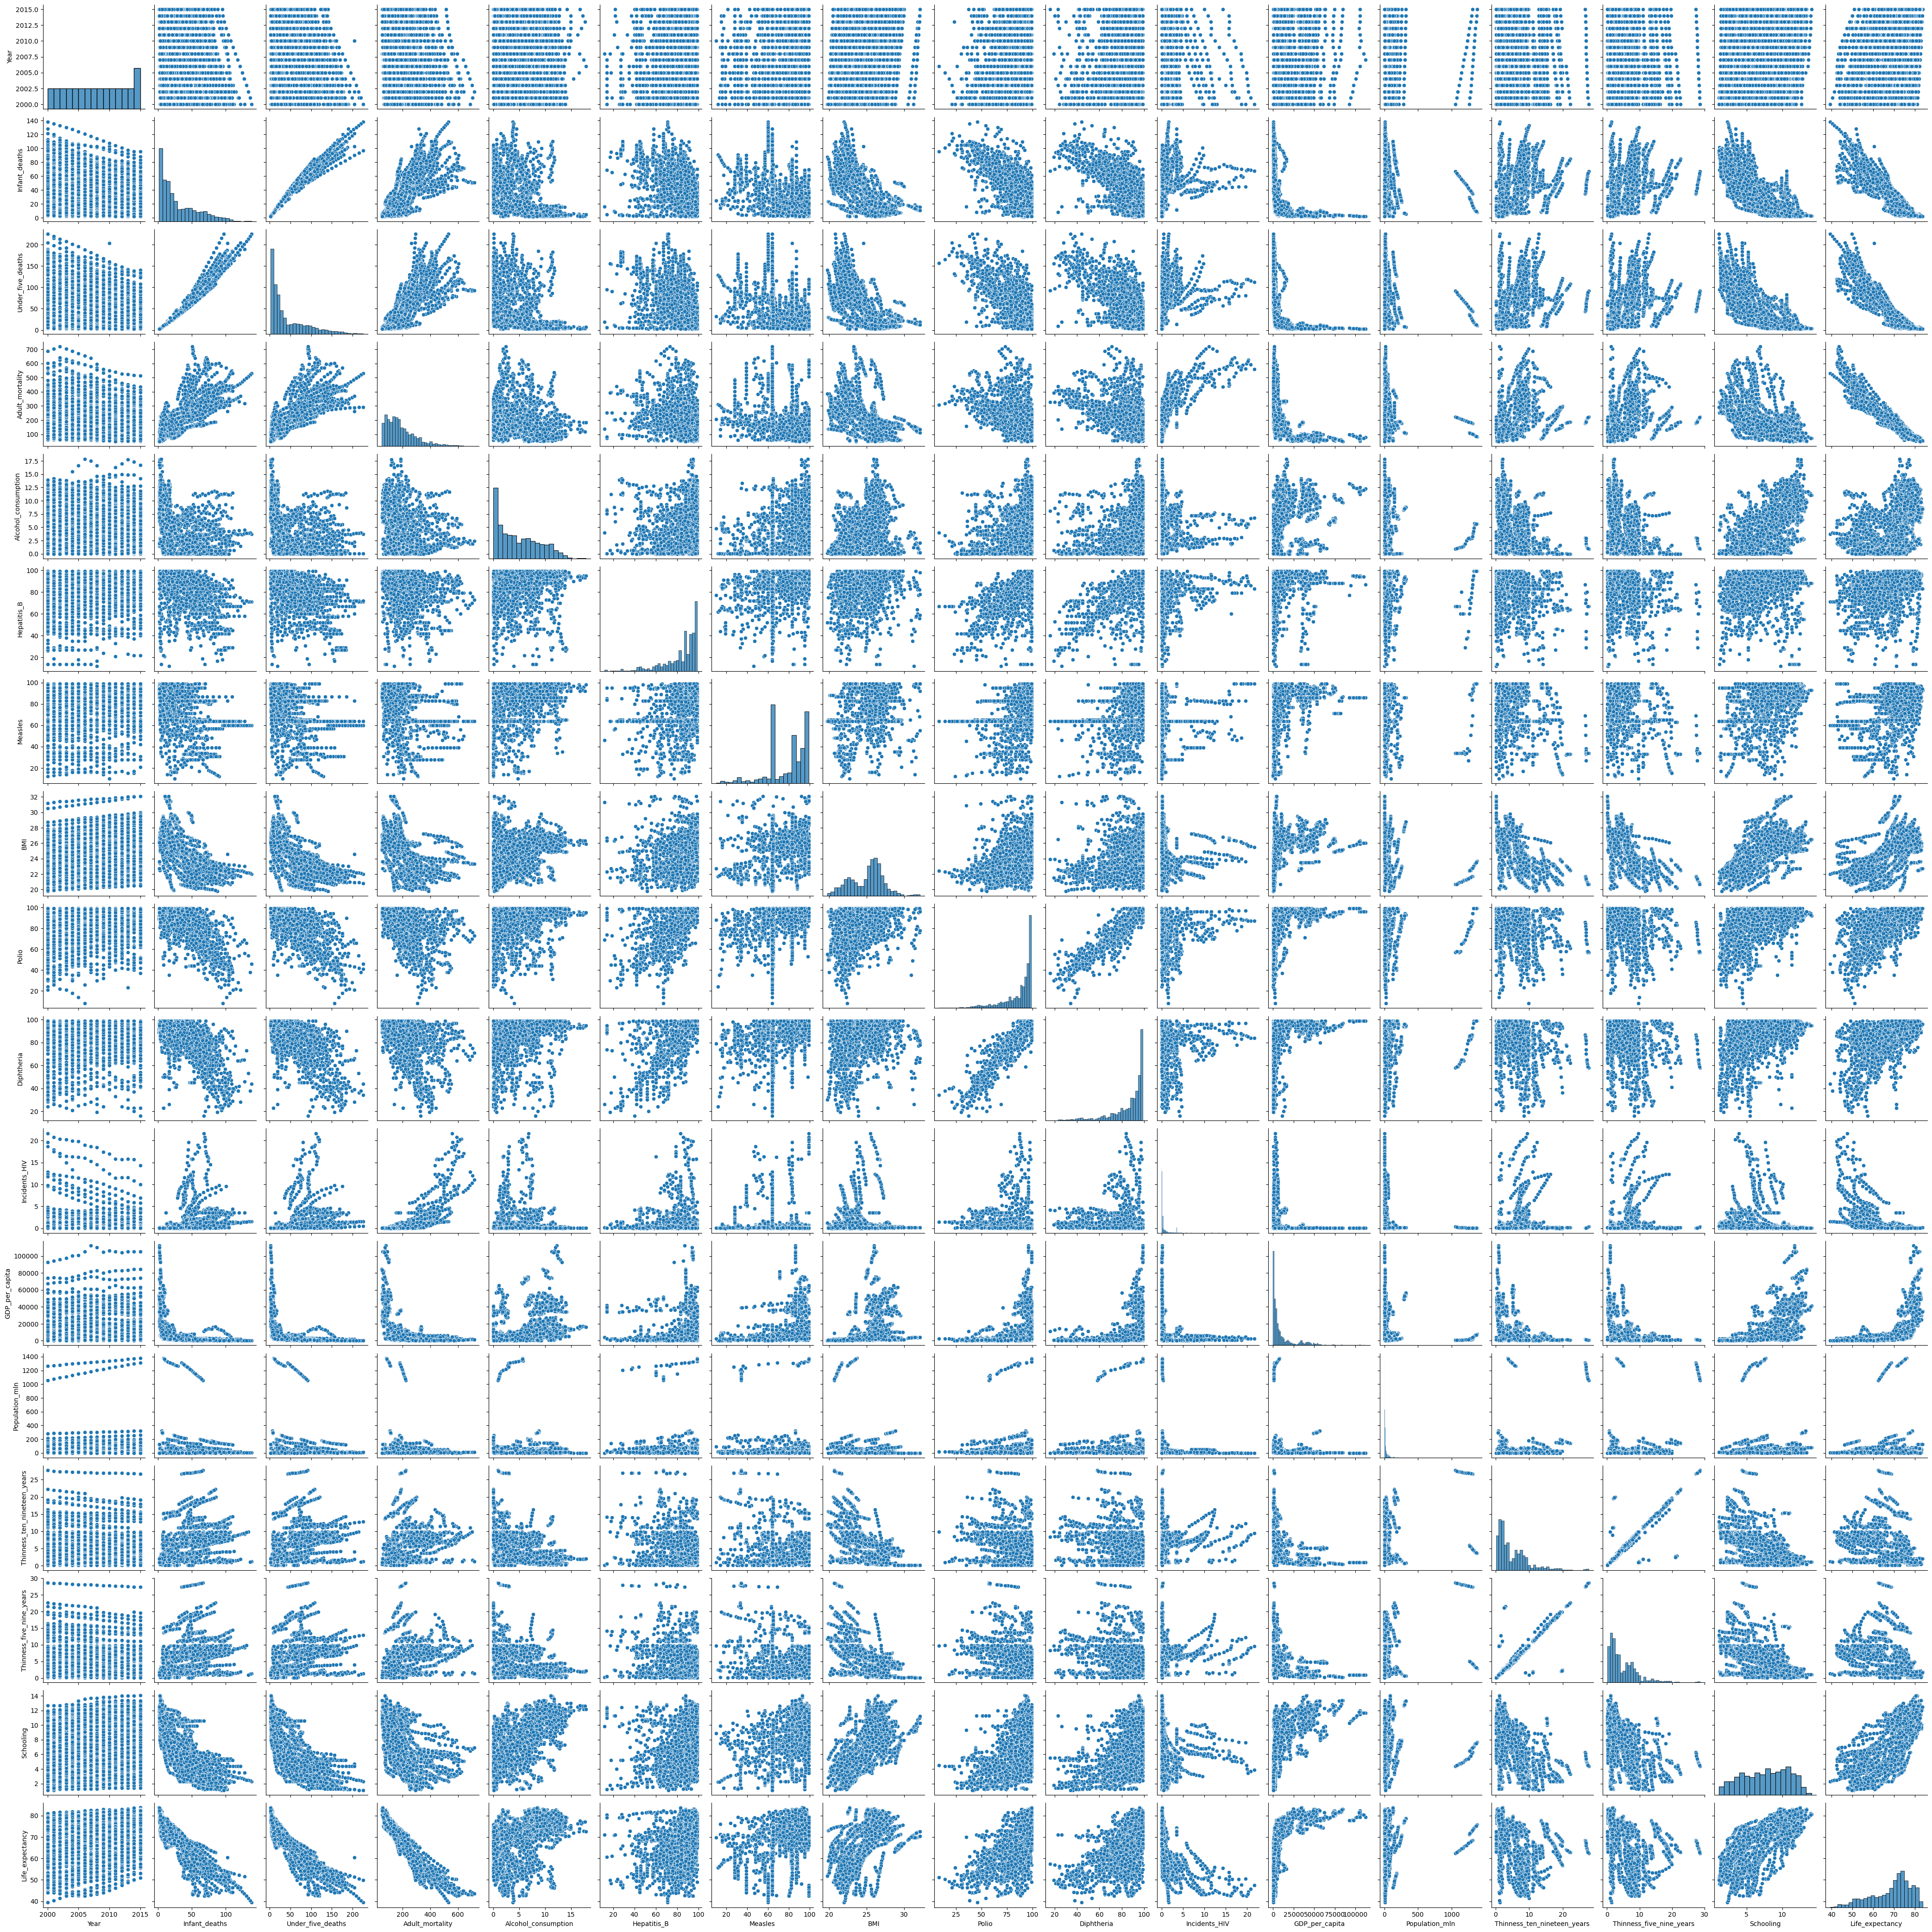

In [20]:
sns.pairplot(df.drop(columns=["Economy_status_Developed", "Economy_status_Developing"]))
plt.show()

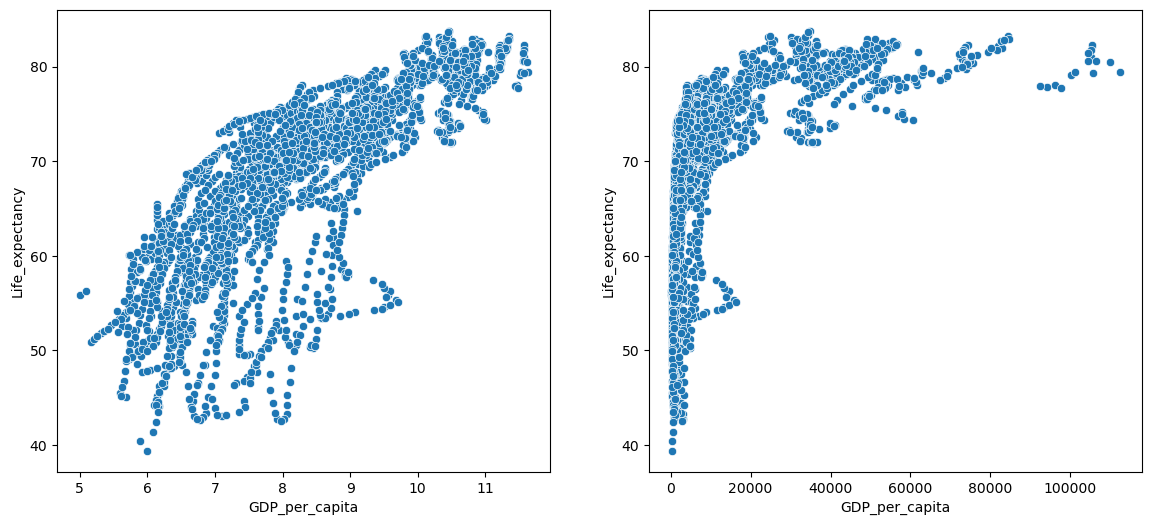

In [21]:
fig, plot = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(
    x=np.log(df['GDP_per_capita']),
    y='Life_expectancy',
    data = df,
    ax = plot[0]
)

sns.scatterplot(
    x='GDP_per_capita',
    y='Life_expectancy',
    data=df,
    ax = plot[1]
)

plt.show()

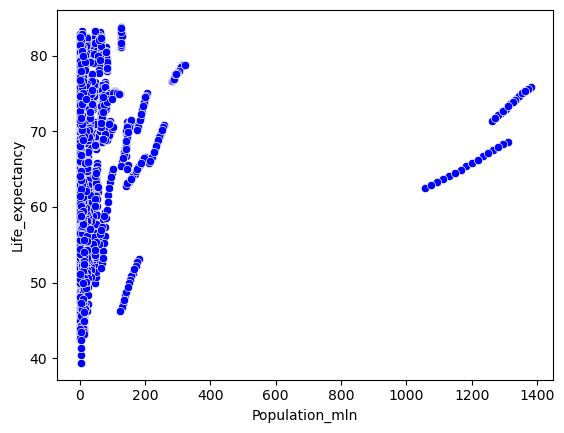

In [22]:
sns.scatterplot(x = 'Population_mln',
                y = 'Life_expectancy',
                color = 'blue',
                data = df)

plt.show()

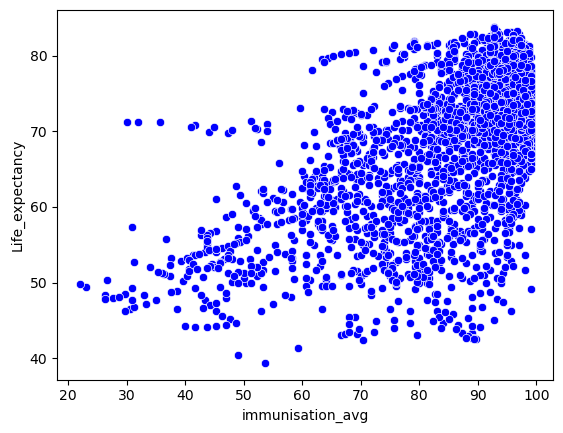

In [23]:
df['immunisation_avg'] = (df['Polio'] + df['Diphtheria'] + df['Hepatitis_B']) / 3 # + df['Measles']

sns.scatterplot(x = 'immunisation_avg',
                y = 'Life_expectancy',
                color = 'blue',
                data = df)                   # check correlation between immunisation_avg and life expectancy in a scatterplot

plt.show()

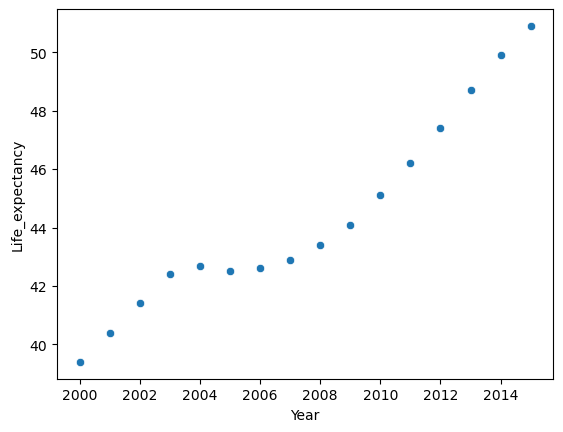

In [24]:
min_per_year = df.groupby('Year')['Life_expectancy'].min().reset_index()
sns.scatterplot(x='Year', y='Life_expectancy', data=min_per_year)
plt.show()

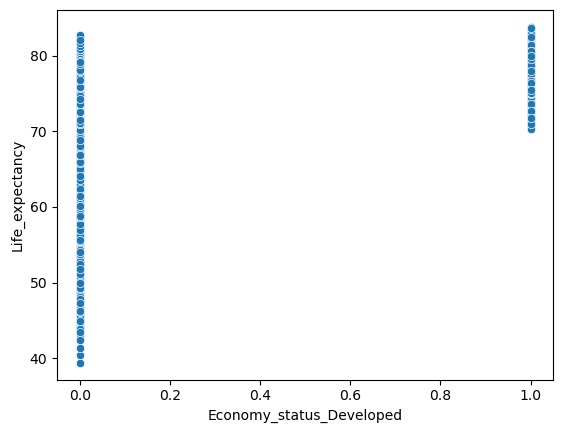

In [25]:
sns.scatterplot(x='Economy_status_Developed', y='Life_expectancy', data=df)
plt.show()

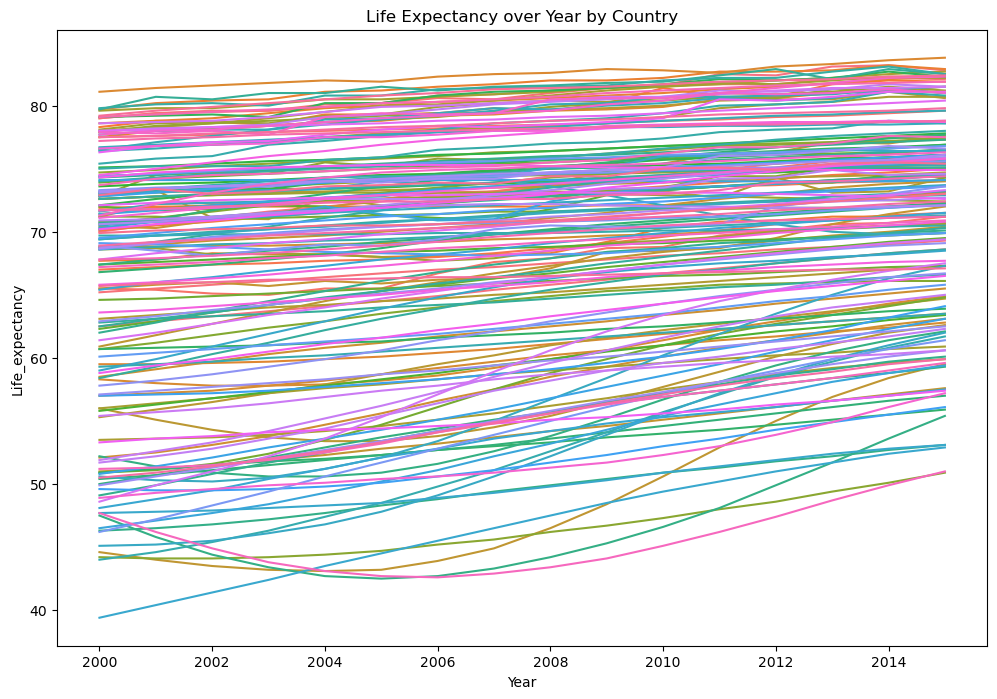

In [26]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Life_expectancy', hue='Country', legend=False)
plt.title('Life Expectancy over Year by Country')
plt.show()

# Optimised Model

In [28]:
# scale_cols = [
#     'Year', 'Infant_deaths', 'Under_five_deaths',
#     'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
#     'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
#     'Population_mln', 'Thinness_ten_nineteen_years',
#     'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
#     'Economy_status_Developing', 'log_GDP', 'immunisation_avg'
# ]

scale_cols = ['Schooling', 'Adult_mortality', 'Under_five_deaths', 'GDP_per_capita', 'Year', 'log_GDP', 'BMI', 'Incidents_HIV']

scaler = StandardScaler()
scaler.fit(X_train[scale_cols])
joblib.dump(scaler, 'opti_scaler.pkl')

def feature_eng(df, scaler, scale_cols):
    df = df.copy()
    df[scale_cols] = scaler.transform(df[scale_cols])
    df = sm.add_constant(df)
    return df

In [29]:
X_train_fe = feature_eng(X_train, scaler, scale_cols)

# X_train_fe.head()

In [30]:
# dropping 'Economy_status_Developing' at index: 17
# dropping 'Polio' at index: 8
# dropping 'Infant_deaths' at index: 1
# dropping 'Diphtheria' at index: 7
# dropping 'Schooling' at index: 12
# dropping 'Hepatitis_B' at index: 4
# dropping 'Thinness_ten_nineteen_years' at index: 9
# dropping 'Adult_mortality' at index: 2
# dropping 'BMI' at index: 4
# dropping 'Measles' at index: 3
# Cond 17.9 RMSE 2.2

# dropping 'Economy_status_Developing' at index: 17
# dropping 'Polio' at index: 8
# dropping 'Infant_deaths' at index: 1
# dropping 'Diphtheria' at index: 7
# dropping 'Schooling' at index: 12
# dropping 'Hepatitis_B' at index: 4
# Cond 39.6 RMSE 1.2

# If cond # doesn't error we're good (<100 maybe even 300, 1000 sounds like a lot)

#'Adult_mortality', 'Under_five_deaths', 'Economy_status_Developed', 'Region_Central America and Caribbean', 
#'GDP_per_capita', 'Region_South America', 'Region_Oceania', 'Region_European Union', 'Year', 'Incidents_HIV', 
#'Region_Asia', 'Region_Rest of Europe', 'Region_North America'

# feature_cols = [
#     'const', 
#     #'Country', 
#     'Year', 
#     #'Infant_deaths', 
#     'Under_five_deaths',
#     'Adult_mortality', 
#     #'Alcohol_consumption', 
#     #'Hepatitis_B', 
#     #'Measles',
#     #'BMI', 
#     #'Polio', 
#     #'Diphtheria', 
#     'Incidents_HIV', 
#     'GDP_per_capita',
#     #'Population_mln', 
#     #'Thinness_ten_nineteen_years',
#     #'Thinness_five_nine_years', 
#     #'Schooling', 
#     'Economy_status_Developed',
#     #'Economy_status_Developing', 
#     'Region_Asia',
#     'Region_Central America and Caribbean', 
#     'Region_European Union',
#     #'Region_Middle East', 
#     'Region_North America', 
#     'Region_Oceania',
#     'Region_Rest of Europe', 
#     'Region_South America',
#     #'log_GDP', 
#     #'immunisation_avg'
# ]

feature_cols = ['const', 'Schooling', 'Adult_mortality', 'Under_five_deaths', 'Economy_status_Developing', 'Region_Central America and Caribbean', 'Region_South America', 'GDP_per_capita', 'Region_Oceania', 'Region_European Union', 'Year', 'log_GDP', 'BMI', 'Incidents_HIV', 'Region_Rest of Europe', 'Region_North America']

# feature_cols = ['const', 'Year', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
#        'Measles', 'BMI', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
#        'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
#        'Economy_status_Developing', 'Region_Asia',
#        'Region_Central America and Caribbean', 'Region_European Union',
#        'Region_Middle East', 'Region_North America', 'Region_Oceania',
#        'Region_Rest of Europe', 'Region_South America', 'immunisation_avg']]
lin_reg = sm.OLS(y_train, X_train_fe[feature_cols])
results = lin_reg.fit()
joblib.dump(results, 'opti_model.pkl')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     9259.
Date:                Fri, 11 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:57:51   Log-Likelihood:                -3674.0
No. Observations:                2291   AIC:                             7380.
Df Residuals:                    2275   BIC:                             7472.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   70.6152      0.159    444.048      0.000      70.303      70.927
Schooling                                0.3440      0.054      6.392      0.000       0.238       0.449
Adult_mortality                         -5.4056      0.071    -76.183      0.000      -5.545      -5.266
Under_five_deaths                       -3.4429      0.065    -52.861      0.000      -3.571      -3.315
Economy_status_Developing               -2.5135      0.164    -15.357      0.000      -2.834      -2.193
Region_Central America and Caribbean     1.8301      0.097     18.905      0.000       1.640       2.020
Region_South America                     1.5339      0.109     14.012      0.000       1.319       1.749
GDP_per_capita                           0.1304      0.056      2.345      0.019       0.021       0.239
Region_Oceania                          -0.8664      0.125     -6.917      0.000      -1.112      -0.621
Region_European Union                   -0.7054      0.157     -4.479      0.000      -1.014      -0.397
Year                                     0.1566      0.026      5.945      0.000       0.105       0.208
log_GDP                                  0.5035      0.078      6.450      0.000       0.350       0.657
BMI                                     -0.3411      0.043     -7.911      0.000      -0.426      -0.257
Incidents_HIV                            0.1779      0.044      4.039      0.000       0.092       0.264
Region_Rest of Europe                    0.3850      0.113      3.409      0.001       0.164       0.606
Region_North America                     0.7020      0.215      3.264      0.001       0.280       1.124
==============================================================================
Omnibus:                       33.967   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.839
Skew:                           0.165   Prob(JB):                     2.48e-11
Kurtosis:                       3.635   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Testing Optimised Prediction

In [31]:
y_pred_train = results.predict(X_train_fe[feature_cols])

rmse_train = statsmodels.tools.eval_measures.rmse(y_train, y_pred_train)

print(rmse_train)

1.2028940271721988


In [32]:
X_test_fe = feature_eng(X_test, scaler, scale_cols)
X_test_fe = X_test_fe[feature_cols]

In [33]:
y_test_pred = results.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

1.226338594806497


# Feature Selection Metrics

## Calculate VIF

#### Determine which features to use. Bigger threshold removes fewer features.

In [34]:
def calculate_vif(X, thresh = 10):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop
    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [35]:
VIF_variables = calculate_vif(X_train_fe[['Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America', 'log_GDP', 'immunisation_avg']])

C:\Users\legom\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


dropping 'Hepatitis_B' at index: 5
dropping 'Economy_status_Developing' at index: 16
dropping 'immunisation_avg' at index: 25
dropping 'Polio' at index: 7
dropping 'Infant_deaths' at index: 1
dropping 'Diphtheria' at index: 6
dropping 'Thinness_ten_nineteen_years' at index: 9
dropping 'log_GDP' at index: 20
Remaining variables:
Index(['Year', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Measles', 'BMI', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Region_Asia', 'Region_Central America and Caribbean',
       'Region_European Union', 'Region_Middle East', 'Region_North America',
       'Region_Oceania', 'Region_Rest of Europe', 'Region_South America'],
      dtype='object')


## Stepwise

In [36]:
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.3, verbose = True):
    # The function is checking for p-values (whether features are statistically significant) - lower is better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text


        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [37]:
result = stepwise_selection(X_train_fe[VIF_variables.columns], y_train)

print('resulting features:')
print(result)

Add  Under_five_deaths              with p-value 0.0
Add  Adult_mortality                with p-value 0.0
Add  Economy_status_Developed       with p-value 1.79712e-150
Add  Region_Central America and Caribbean with p-value 1.8882e-48
Add  GDP_per_capita                 with p-value 1.15359e-38
Add  Region_South America           with p-value 1.1788e-43
Add  Region_Oceania                 with p-value 9.21724e-27
Add  Region_European Union          with p-value 1.77416e-16
Add  Schooling                      with p-value 2.635e-12
Add  Year                           with p-value 5.84386e-06
Add  BMI                            with p-value 3.22967e-06
Add  Incidents_HIV                  with p-value 4.61358e-07
Add  Region_North America           with p-value 0.00833472
resulting features:
['Under_five_deaths', 'Adult_mortality', 'Economy_status_Developed', 'Region_Central America and Caribbean', 'GDP_per_capita', 'Region_South America', 'Region_Oceania', 'Region_European Union', 'School

## Lasso

In [38]:
lasso = LassoCV(cv=5)
lasso.fit(X_train_fe[['Schooling', 'Adult_mortality', 'Under_five_deaths', 'Economy_status_Developing', 'Region_Central America and Caribbean', 'Region_South America', 'GDP_per_capita', 'Region_Oceania', 'Region_European Union', 'Year', 'log_GDP', 'BMI', 'Incidents_HIV', 'Region_Rest of Europe', 'Region_North America']], y_train)
print(f'Selected features: {X_train_fe[['Schooling', 'Adult_mortality', 'Under_five_deaths', 'Economy_status_Developing', 'Region_Central America and Caribbean', 'Region_South America', 'GDP_per_capita', 'Region_Oceania', 'Region_European Union', 'Year', 'log_GDP', 'BMI', 'Incidents_HIV', 'Region_Rest of Europe', 'Region_North America']].columns[lasso.coef_ != 0].tolist()}')

Selected features: ['Schooling', 'Adult_mortality', 'Under_five_deaths', 'Economy_status_Developing', 'Region_Central America and Caribbean', 'Region_South America', 'GDP_per_capita', 'Region_Oceania', 'Region_European Union', 'Year', 'log_GDP', 'BMI', 'Incidents_HIV', 'Region_Rest of Europe', 'Region_North America']


# Limited Model

In [39]:
df = pd.read_csv("Life Expectancy Data.csv")

In [40]:
df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region', dtype = int)

feature_cols = [ 'Year',
                 'Region_Asia',
                 'Region_Central America and Caribbean',
                 'Region_European Union',
                 'Region_Middle East',
                 'Region_North America',
                 'Region_Oceania',
                 'Region_Rest of Europe',
                 'Region_South America',
                 'Under_five_deaths',
                 'Adult_mortality',
                 'GDP_per_capita',
                 'Economy_status_Developing']

In [41]:
X = df[feature_cols]
X = sm.add_constant(X) # don't forget to add the constant
y = df.Life_expectancy
X.shape

(2864, 14)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
scale_cols = [ 'Year', 'Under_five_deaths', 'Adult_mortality', 'GDP_per_capita', 'Economy_status_Developing']
scaler = MinMaxScaler()
scaler.fit(X_train[scale_cols])
joblib.dump(scaler, 'limited_scaler.pkl')

def feature_eng(df, scaler, scale_cols):
    df = df.copy()
    df[scale_cols] = scaler.transform(df[scale_cols])
    df = sm.add_constant(df)
    return df

In [44]:
X_train = feature_eng(X_train, scaler, scale_cols)
X_test = feature_eng(X_test, scaler, scale_cols)

In [45]:
lin_reg = sm.OLS(y_train, X_train) # initialising the model object – remember, for sm it's y first and then X
results = lin_reg.fit() # creating an object for the fitted model
joblib.dump(results, 'limited_model.pkl')
y_pred = results.predict(X_train) # adding our predictions back to the table
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.014e+04
Date:                Fri, 11 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:58:14   Log-Likelihood:                -3734.2
No. Observations:                2291   AIC:                             7496.
Df Residuals:                    2277   BIC:                             7577.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   80.1342      0.210    382.080      0.000      79.723      80.545
Year                                     0.4970      0.088      5.670      0.000       0.325       0.669
Region_Asia                              0.3626      0.101      3.582      0.000       0.164       0.561
Region_Central America and Caribbean     1.9026      0.118     16.119      0.000       1.671       2.134
Region_European Union                   -0.6891      0.174     -3.962      0.000      -1.030      -0.348
Region_Middle East                       0.0992      0.133      0.746      0.456      -0.161       0.360
Region_North America                     0.6788      0.228      2.978      0.003       0.232       1.126
Region_Oceania                          -1.1276      0.132     -8.521      0.000      -1.387      -0.868
Region_Rest of Europe                    0.4962      0.130      3.820      0.000       0.241       0.751
Region_South America                     1.7102      0.130     13.136      0.000       1.455       1.966
Under_five_deaths                      -18.8613      0.248    -75.956      0.000     -19.348     -18.374
Adult_mortality                        -28.6620      0.272   -105.212      0.000     -29.196     -28.128
GDP_per_capita                           3.0448      0.266     11.465      0.000       2.524       3.566
Economy_status_Developing               -3.0186      0.161    -18.708      0.000      -3.335      -2.702
==============================================================================
Omnibus:                       44.454   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.147
Skew:                           0.222   Prob(JB):                     3.20e-14
Kurtosis:                       3.673   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Testing Limited

In [46]:
statsmodels.tools.eval_measures.rmse(y_train, y_pred)

1.2348959075150119

In [47]:
y_test_pred = results.predict(X_test)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print('Test RMSE is: ', rmse)

Test RMSE is:  1.246503797410479
